In [1]:
import os
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/yaga_phd"
sys.path.insert(0, folder_path)
# insert local abaqusrve project
folder_path = "/home/jiaxiangyi/Documents/abaqusrve"
sys.path.insert(0, folder_path)
# local
import yaga_phd
from yaga_phd.design_of_experiment.samplers import FixNumberSampler

import abaqusrve
from abaqusrve.cases.asca_rve import AscaRVE

In [3]:
# create the doe
# define the design space
doe_variables = OrderedDict({"E_matrix": 100})
# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["strain", "stress"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
samples = doe_sampler.samples
responses = doe_sampler.responses
print(doe_sampler.samples)
print(doe_sampler.responses)
samples_dict = doe_sampler.samples.to_dict("records")

   E_matrix
0     100.0
1     100.0
2     100.0
  strain stress
0    NaN    NaN
1    NaN    NaN
2    NaN    NaN


In [4]:
# initialize the rve simulator 
simulator = AscaRVE()
simulator.update_sim_info(
    hardening_law="swift", yield_stress=0.5, a=0.2, b=0.4, print_info=True
)


Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.05,
        0.0,
        0.0
    ],
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 1,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


In [5]:
# calculate the initial responses of simulation
for ii in range(len(samples_dict)):
    results = simulator.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )
    # update DoE information
    for jj in range(len(list(responses.keys()))):
        responses.at[ii, list(responses.keys())[jj]] = results[
            list(responses.keys())[jj]
        ]



/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :210.004573 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :215.002743 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_2
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :210.004641 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


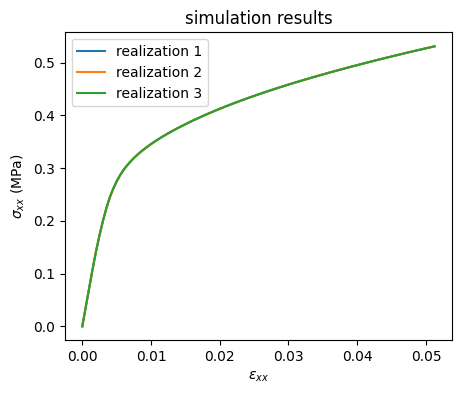

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
ax.plot(
    responses["strain"][0][:, 0, 0],
    responses["stress"][0][:, 0, 0],
    label='realization 1',
)
ax.plot(
    responses["strain"][1][:, 0, 0],
    responses["stress"][1][:, 0, 0],
    label='realization 2',
)
ax.plot(
    responses["strain"][2][:, 0, 0],
    responses["stress"][2][:, 0, 0],
    label='realization 3',
)
ax.legend()
ax.set(**pparam)
plt.title('simulation results')
plt.show()